In [22]:
import sys
!conda install --yes --prefix  {sys.prefix} anaconda scikit-learn
!conda install --yes --prefix  {sys.prefix} seaborn
!conda install --yes --prefix  {sys.prefix} pandas-profiling

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /Users/sbahri/opt/anaconda3

  added / updated specs:
    - pandas-profiling


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pandas-profiling-1.4.1     |           py37_0          40 KB
    ------------------------------------------------------------
                                           Total:          40 KB

The following NEW packages will be INSTALLED:

  pandas-profiling   pkgs/main/osx-64::pandas-profiling-1.4.1-py37_0



pandas-profiling-1.4 | 40 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


df = pd.read_csv("https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv")

df.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


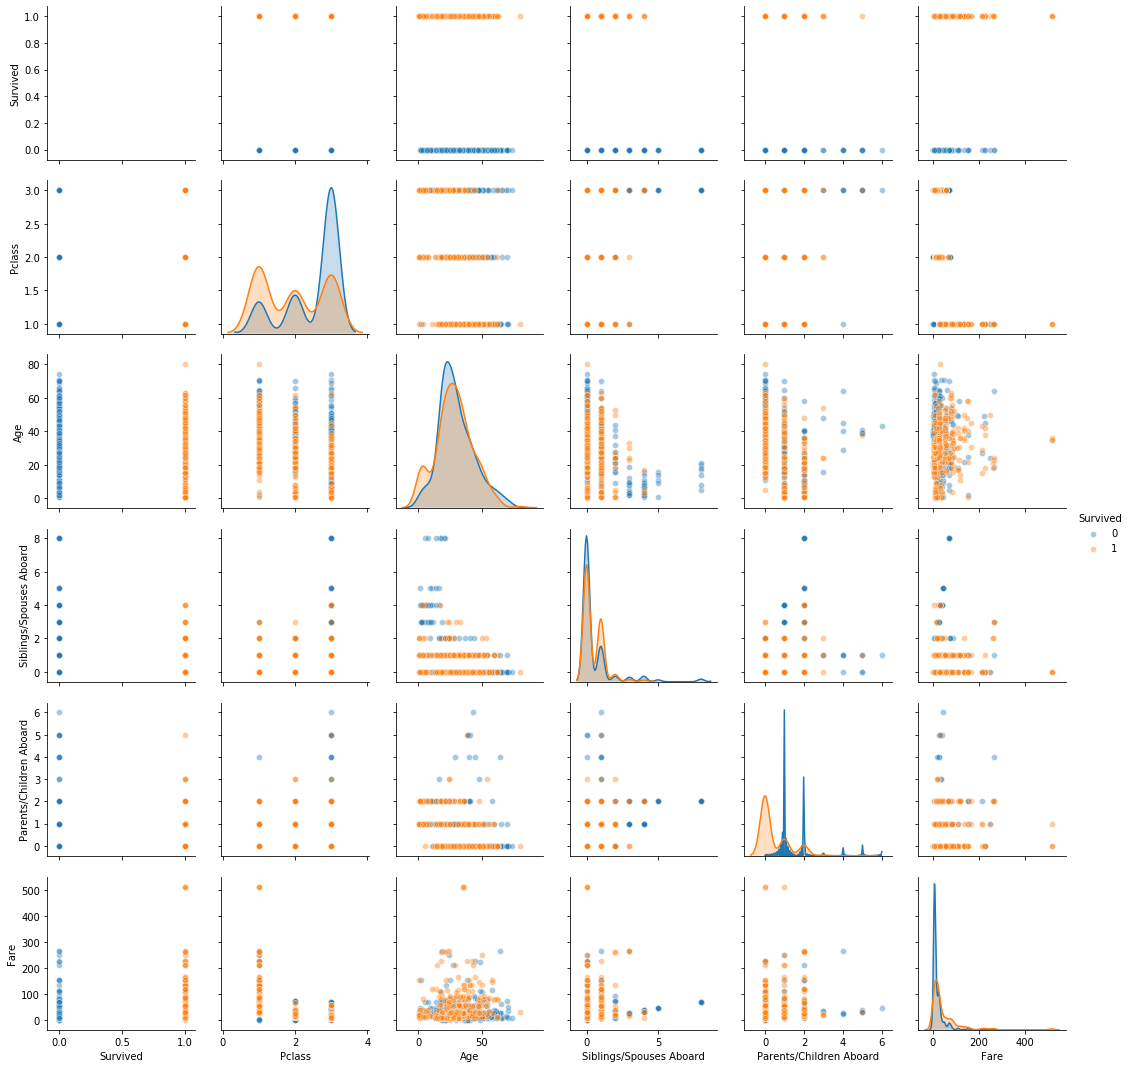

In [27]:
#glimpsed visualiastion

sns.pairplot(df, kind = "scatter", hue = "Survived", plot_kws={'alpha':0.4})
plt.show()

In [74]:
#data transformation 

df = df.drop(['Name'], axis=1)

df.head(5)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [102]:
#hot encoding sex

df_clean = df.copy()
df_clean['male'] = [1 if Sex == 'male' else 0 for Sex in df_clean['Sex']]
df_clean['female'] = [1 if Sex == 'female' else 0 for Sex in df_clean['Sex']]
df_clean = df_clean.drop(['Sex'], axis = 1)

df_clean.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,female
0,0,3,22.0,1,0,7.2500,1,0
1,1,1,38.0,1,0,71.2833,0,1
2,1,3,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,1
4,0,3,35.0,0,0,8.0500,1,0


Pearson Correlation Heatmap


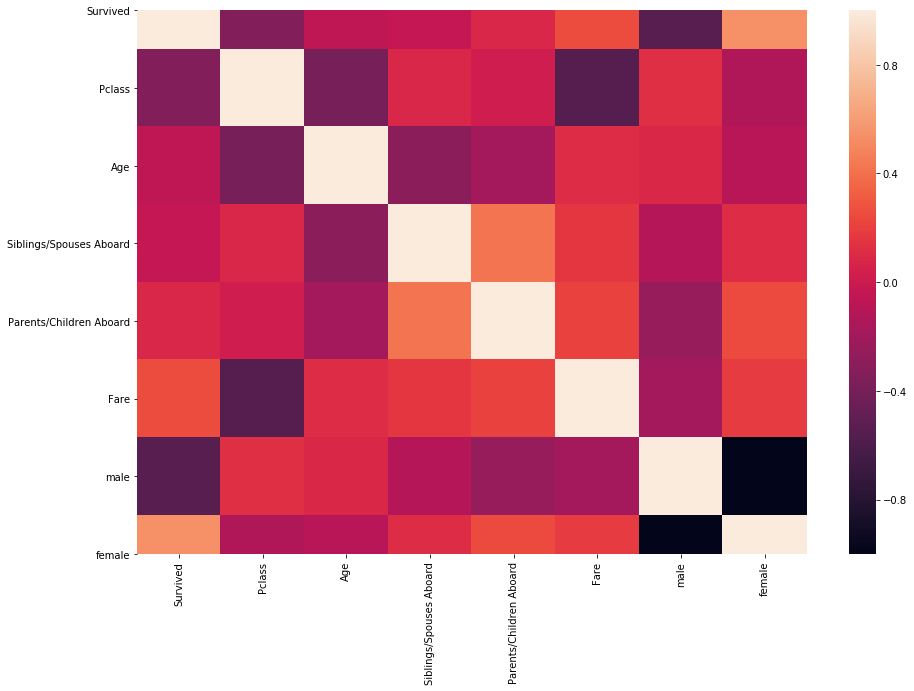

In [134]:
#correlation

print("Pearson Correlation Heatmap")

plt.figure(figsize=(15,10))
sns.heatmap(df_clean.corr())
plt.show()

In [131]:
#split data
from sklearn.model_selection import train_test_split

#separate y from x data set
x = df_clean.drop('Survived', axis = 1)
y = df_clean['Survived']


#split data using sklearn.model_selection
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 0)


print("X Train Set\n", xtrain.describe())
print("Y Train Set\n", ytrain.describe())



X Train Set
            Pclass        Age  Siblings/Spouses Aboard  \
count  620.000000  620.00000               620.000000   
mean     2.282258   29.44450                 0.493548   
std      0.838882   13.87531                 1.012821   
min      1.000000    0.42000                 0.000000   
25%      1.750000   20.37500                 0.000000   
50%      3.000000   28.00000                 0.000000   
75%      3.000000   38.00000                 1.000000   
max      3.000000   80.00000                 8.000000   

       Parents/Children Aboard       Fare        male      female  
count               620.000000  620.00000  620.000000  620.000000  
mean                  0.379032   33.00381    0.651613    0.348387  
std                   0.837266   50.91637    0.476844    0.476844  
min                   0.000000    0.00000    0.000000    0.000000  
25%                   0.000000    7.89580    0.000000    0.000000  
50%                   0.000000   14.45420    1.000000    0.000000

In [ ]:
#model creation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


